## What is the true normal human body temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. In 1992, this value was revised to 36.8$^{\circ}$C or 98.2$^{\circ}$F. 

#### Exercise
In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.

Answer the following questions **in this notebook below and submit to your Github account**. 

1.  Is the distribution of body temperatures normal? 
    - Remember that this is a condition for the CLT, and hence the statistical tests we are using, to apply. 
2.  Is the true population mean really 98.6 degrees F?
    - Bring out the one sample hypothesis test! In this situation, is it approriate to apply a z-test or a t-test? How will the result be different?
3.  At what temperature should we consider someone's temperature to be "abnormal"?
    - Start by computing the margin of error and confidence interval.
4.  Is there a significant difference between males and females in normal temperature?
    - Set up and solve for a two sample hypothesis testing.

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [29]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt 
%matplotlib inline

In [28]:
df = pd.read_csv('data/human_body_temperature.csv')

98.2492307692 0.733183158039


NormaltestResult(statistic=2.7038014333192031, pvalue=0.2587479863488254)

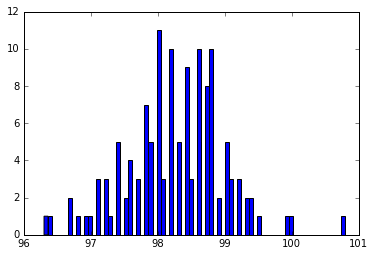

In [33]:
# Number 1

ax = plt.subplot()  
ax.hist(df.temperature, bins = 75)
print df.temperature.mean(),df.temperature.std()
stats.normaltest(df.temperature)

This appears to be a normal distribution because it has a central peak and doesn't seem to have a lot of left or right bias.
It looks relatively symmetrical around the central value.  A bell curve would fit pretty well on this. Running a normal test gives us a pvalue of about .26 which is far greater than .05 so we do not reject the null hypothesis that df.temperature is normally distributed.

In [44]:
# Number 2
# z = (sample mean - mean of sampling distribution of the mean)/ standard deviation of sampling distribution of the mean
# H0: the population mean is 98.6
# H1: the population mean is not 98.6 

# CLT says mean of sampling distribution of the mean is equal to the population mean
pop_mean = 98.6
sample_mean = df.temperature.mean()

# Standard devation of sampling distribution of the mean = population standard devation / Sqrt(sample size)
# My sample size is > 30 so I can estimate the population standard deviation to be equal to the sample standard deviation
sample_std = df.temperature.std()
n = len(df.temperature)
std_dev_of_samp_dist= sample_std/np.sqrt(n)

z = (sample_mean - pop_mean) / std_dev_of_samp_dist
print "z =", z

# I couldn't find a z-table with values this large so I looked up how to use scipy to get the p value
p_value=stats.norm.cdf(z)
print "p value =",p_value

# I can reject the null hypothesis because my p value is less than the significant level of .05
# The p value of 2.45107850706e-08 means there is a .00000245107850706% chance of getting that result randomly 
# Therefore I conclude that the population mean is not 98.6

z = -5.45482329236
p value = 2.45107850706e-08


0.68268949213708585

My null hypothesis was that the population mean is 98.6 degrees.  I used a z-test because the sample size is greater than 30.  I ended up rejecting the null hypothesis and concluding that the population mean is not 98.6.

In [58]:
# Number 3 
# I can use the std_dev_of_samp_dist from the last problem as my standard error
# I will use a 99% confidence interval

print stats.norm.ppf(.005)

#I subtract 2.56 * std_dev_of_samp_dist and add 2.56 * std_dev_of_samp_dist from the sample mean to get the confidence interval
print "Confidence interval:", sample_mean - 2.56 * std_dev_of_samp_dist, "to", sample_mean + 2.56 * std_dev_of_samp_dist
print "Standard Error:", std_dev_of_samp_dist

-2.57582930355
Confidence interval: 98.0846114621 to 98.4138500763
Standard Error: 0.0643044168379


In [ ]:
# Number 4


